In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline


from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

df=pd.read_csv('C:/Users/HUAWEI/Downloads/new_Df.csv')


,Unnamed: 0,Price,Num_Of_Bedrooms,Num_Of_Bathrooms,Size(m²),District
0,0,2900000.0,7,5,300.0,حي القيروان - الرياض
1,1,1190000.0,7,5,225.0,حي الرمال - الرياض
2,2,2600000.0,4,4,312.0,حي عرقة - الرياض
3,3,1100000.0,7,5,280.0,حي الصواري - الخبر
4,4,3000000.0,4,4,600.0,حي الزمرد - جدة
...,...,...,...,...,...,...
1975,1975,980000.0,5,5,350.0,حي طيبة - الرياض
1976,1976,1850000.0,7,5,268.0,حي الشراع - جدة
1977,1977,1200000.0,5,4,400.0,حي الراشدية - مكة المكرمة
1978,1978,1350000.0,5,5,240.0,حي ظهرة نمار - الرياض


In [106]:

df.columns=df.columns.str.strip()
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
df


,Price,Num_Of_Bedrooms,Num_Of_Bathrooms,Size(m²),District
0,2900000.0,7,5,300.0,حي القيروان - الرياض
1,1190000.0,7,5,225.0,حي الرمال - الرياض
2,2600000.0,4,4,312.0,حي عرقة - الرياض
3,1100000.0,7,5,280.0,حي الصواري - الخبر
4,3000000.0,4,4,600.0,حي الزمرد - جدة
...,...,...,...,...,...
1975,980000.0,5,5,350.0,حي طيبة - الرياض
1976,1850000.0,7,5,268.0,حي الشراع - جدة
1977,1200000.0,5,4,400.0,حي الراشدية - مكة المكرمة
1978,1350000.0,5,5,240.0,حي ظهرة نمار - الرياض


In [107]:
df.drop(columns=df.columns[4], 
        axis=1, 
        inplace=True)
df

,Price,Num_Of_Bedrooms,Num_Of_Bathrooms,Size(m²)
0,2900000.0,7,5,300.0
1,1190000.0,7,5,225.0
2,2600000.0,4,4,312.0
3,1100000.0,7,5,280.0
4,3000000.0,4,4,600.0
...,...,...,...,...
1975,980000.0,5,5,350.0
1976,1850000.0,7,5,268.0
1977,1200000.0,5,4,400.0
1978,1350000.0,5,5,240.0


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [109]:
#Shows X
X,y=df.drop('Price',axis=1), df['Price']
X



,Num_Of_Bedrooms,Num_Of_Bathrooms,Size(m²)
0,7,5,300.0
1,7,5,225.0
2,4,4,312.0
3,7,5,280.0
4,4,4,600.0
...,...,...,...
1975,5,5,350.0
1976,7,5,268.0
1977,5,4,400.0
1978,5,5,240.0


In [111]:
y


0       2900000.0
1       1190000.0
2       2600000.0
3       1100000.0
4       3000000.0
          ...    
1975     980000.0
1976    1850000.0
1977    1200000.0
1978    1350000.0
1979    1260000.0
Name: Price, Length: 1980, dtype: float64

In [112]:
#spilt the data 

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [113]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.25,random_state=10)


In [114]:
#biuld model (baseline)
LR= LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [115]:
#scoring
print(f'Linear Regression validation score :{LR.score(X_val,y_val):.4f}')



Linear Regression validation score :0.5122


In [157]:
print(LR.intercept_)
print(LR.coef_)

-114634.23910851683
[151691.72347    -46841.88195969   3657.74349731]


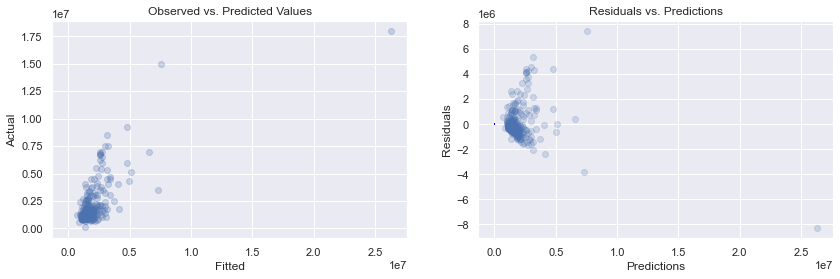

In [160]:
plt.figure(figsize=(14,4))

# Plotting predicted vs. observed
y_pred = LR.predict(X_val)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_val, alpha=0.25)
plt.plot([0, 8000], [0,  8000],'k--', lw=2,color='blue')
plt.xlabel('Fitted')
plt.ylabel('Actual')
plt.title("Observed vs. Predicted Values")
plt.savefig("actual_vs_observed.pdf")

# Residuals
lm_residuals = y_val - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, lm_residuals, alpha=.2)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.plot([0,10000], [0, 0],'k--', lw=2,color='blue')
plt.title("Residuals vs. Predictions")
plt.savefig("residuals.pdf");

In [116]:
#I've completed : first modeling
#Linear Regression validation score :0.5122


In [117]:
#second model with polynomial 
poly =PolynomialFeatures(degree=1)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly=poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_lr=LinearRegression()

poly_lr.fit(X_train_poly,y_train)  

print(f'Po Regression validation score :{poly_lr.score(X_val_poly,y_val):.4f}')


Po Regression validation score :0.5122


In [ ]:
#Note:
    #there is no improvement to  the model , so I'll move to the ridge model  

In [149]:
# Ridge model 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_ridge=Ridge(alpha=200)
lr_ridge.fit(X_train_scaled,y_train)

#x_validation

Ridge(alpha=200)

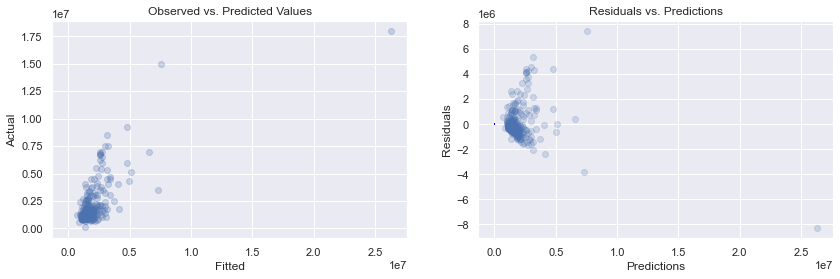

In [159]:
plt.figure(figsize=(14,4))

# Plotting predicted vs. observed
y_pred = poly_lr.predict(X_val_poly)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_val, alpha=0.25)
plt.plot([0, 8000], [0,  8000],'k--', lw=2,color='blue')
plt.xlabel('Fitted')
plt.ylabel('Actual')
plt.title("Observed vs. Predicted Values")
plt.savefig("actual_vs_observed.pdf")

# Residuals
poly_residuals = y_val - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, poly_residuals, alpha=.2)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.plot([0,10000], [0, 0],'k--', lw=2,color='blue')
plt.title("Residuals vs. Predictions")
plt.savefig("residuals.pdf");

In [153]:
print(f'Po Regression validation score :{lr_ridge.score(X_val_scaled,y_val):.4f}')


Po Regression validation score :0.5274


In [ ]:
# I as we've shown above the validation score increased with ridge model 

In [150]:
scaler = StandardScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)

X_val_poly_scaled = scaler.transform(X_val_poly)
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")



1254    1.051672e+06
744    -6.665650e+05
990    -3.760787e+05
661     4.346296e+06
1839   -6.051762e+05
            ...     
1393   -5.196279e+05
1344   -3.934516e+05
527    -9.270273e+05
1149   -4.602780e+05
1289   -2.302780e+05
Name: Price, Length: 1584, dtype: float64


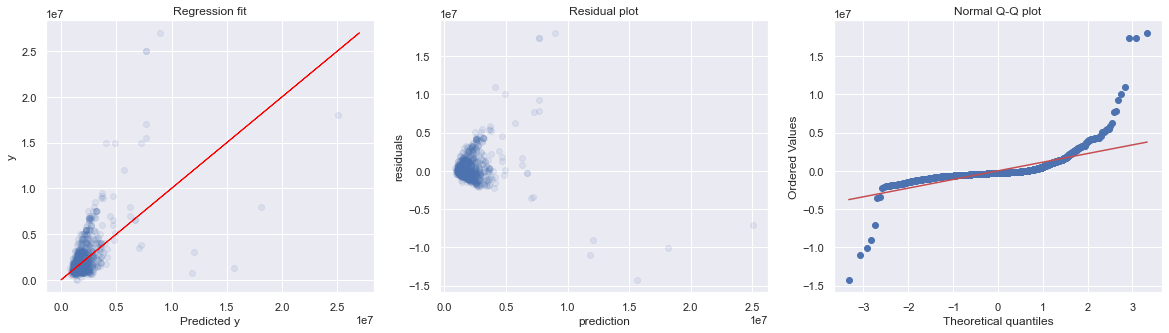

In [139]:

sns.set(style='darkgrid')
diagnostic_plot(X , y)



In [156]:
#baseline model visullesed as above 
#-it follows normal distribution form as first two graohs ,it depicts the residuals btw current and predictive ,



LR.fit(X_train, y_train)
print(f'Linear Regression val R^2 : {LR.score(X_val,y_val):.3f}')

lr_ridge.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_ridge.score(X_val_scaled, y_val):.3f}')

poly_lr.fit(X_train_poly, y_train)
print(f'Degree 1 polynomial regression val R^2: {poly_lr.score(X_val_poly, y_val):.3f}')






Linear Regression val R^2 : 0.512
Ridge Regression val R^2: 0.527
Degree 1 polynomial regression val R^2: 0.512


In [ ]:
#above the comparison btw three models 

In [162]:
#Ridge Regression is the best model.

lr_ridge.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_ridge.score(X_val_scaled, y_val):.3f}')


Ridge Regression val R^2: 0.527


# Method 2: Cross-Validation / Test¶

In [163]:
from sklearn.model_selection import (cross_val_score, KFold, GridSearchCV)

In [164]:

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [166]:
LR = LinearRegression()

scores = cross_val_score(LR, X_train, y_train, cv=kfold)
print(scores)
print("Linear Mean Score: ", np.mean(scores))

# Build the Model
LR.fit(X_train, y_train)

[ 0.10435254  0.40340836  0.30692602 -0.60211268  0.41952237]
Linear Mean Score:  0.12641932178189422


LinearRegression()

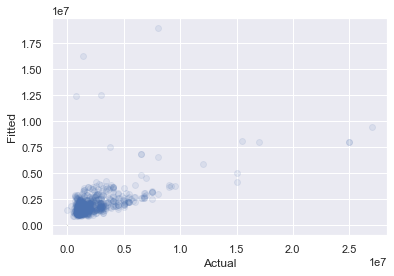

In [167]:
y_train_pred = LR.predict(X_train)
plt.ylabel('Fitted')
plt.xlabel('Actual')
plt.scatter(y_train, y_train_pred, alpha=0.1)
plt.plot([0, 8000], [0, 8000],'k--', lw=2)

Lasso Model:


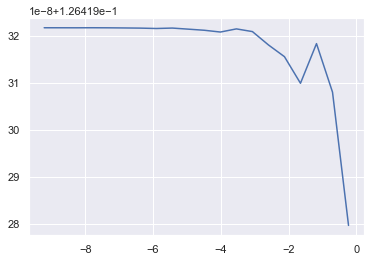

In [168]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

In [169]:
params['alpha']

array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])

In [170]:
grid_est.best_estimator_

Lasso(alpha=0.000412847323771536)

In [ ]:
#the scored obtained on validation 